# Assignment 1 - Axelrods tournament

#### When you have finished <font color="red">download this page as an IP Notebook file</font> (File -> Download as -> IPython Notebook (.ipynb) ) and then upload to WOLF by midnight on Friday 17/11/2017

#### <font color="purple">Please enter your Student Number in the space provided below</font>

In [1]:
#1828473

Implement a series of player/agents to play the prisoners dilemma against each other for Axelrod’s tournament and see which strategy performs the best overall.  This assignment is worth <b>40%</b> of the module.<br>Below is the code for a very simple player use this as a template for the design of your other players.  

<font color="red"><b>Q-1:</b></font><font color="purple">You will devise and add your tournament players in the space below.  You should produce a minimum of 6 different strategies, comment your code to indicate the name or nature of the strategy.</font> <b> (4 marks each)</b><br><br>Each player should be in a class name prefixed with the name Player, so if your player is to be called <b><font color="purple">Bond</font></b> your class name should be Player<b><font color="purple">Bond</font></b>.  Each player class should contain one method with the prototype<br> 
&emsp;&emsp;&emsp;&emsp;<b><font color="blue">move</font>(<font color="red">self, history</font>)</b><br>The history parameter gives two lists the history of player's moves against the current opponent and the history of the opponent's aginst the player. The method should also <b><font color="blue">return</font></b> either a <b><font color="green">'C'</font></b> or a <b><font color="green">'D'</font></b> for cooperate or defect respectively. <i>Note: You can place multiple Player classes in the space provided below.</i> 

In [2]:
import random

In [3]:
class PlayerCommute:

    def move(self, history):
        mine, theirs = history
        return 'C'

In [4]:
class PlayerDecieve:

    def move(self, history):
        mine, theirs = history
        return 'D'

In [5]:
class PlayerEqual:

    def move(self, history):
        mine, theirs = history
        data = random.randint(1,2)
        if data == 2:
            return 'C'
        else:
            return 'D'

In [6]:
# class PlayerAny:

#     def move(self, history):
#         mine, theirs = history
#         run = random.choice('C','D')
#         if run == 'C':
#             return 'C'
#         else:
#             return 'D'

In [7]:
import random
class PlayerDice:
    
    def move(self, history):
        mine, theirs = history
        value = random.randint(1,6)
        if value<3:
            return 'C'
        else:
            return 'D'
    

In [8]:
class PlayerAverage:

    def move(self, history):
        mine, theirs = history
        sum = random.randint(1,999)
        average = sum/2
        
        if average >50:
            return 'C'
        else:
            return 'D'

In [9]:
# class PlayerNice:
    
#     def move(self, history):
#         mine, theirs = history
        
#         if len(mine) == 0:
#             return 'C

#         average = sum(self) /len(mine)
#         if average >0.8:
#             return 'C'
#         else:
#             return 'D'
        

In [10]:
import random
class PlayerCondition:

    def move(self, history):
        mine, theirs = history
        a = ["Accept", "Decline"]
        b = ["Accept", "Decline"]
        G = random.choice(a)
        H = random.choice(b)
        
        if (G == 'Accept' and H=='Accept'):
            return 'C'
        if (G == 'Accept' and H=='Decline'):
            return 'D'
        if (G == 'Decline' and H=='Decline'):
            return 'C'
        if (G == 'Decline' and H=='Accept'):
            return 'D'

In [11]:
# class Playerfive:

#     def move(self,history):
#         mine, theirs = history
#         if mine == 0:        
#             return 'D'    
#         if theirs > 0:
#             check = []
#             #(mine, theirs) = history[-1]
#             check.append(theirs)          
#             if 'C' in check:    
#                 import random
#                 number = random.randint(1,10)
#                 if number == 10:
#                     return 'D'
#                 else:
#                     return 'C'
#             else:
#                 return 'D'

The code below is a modified version of Allen B. Downey's program to play Axelrods tournament in IPython notepad.  The player code is now read from classes in memory rather than local files and a score for each agent as follows:<br> - 3 if they both cooperate<br> - 1 if they both defect<br> - 5 if a player defects against a cooperating player and<br> - 0 if a player cooperates against a defecting player.

In [12]:
""" 
Code example by Allen B. Downey 
from Complexity and Computation (2011).  
Modified by D. Case to work in IPython notebook.
"""
## The following are methods/functions/operators that 
## it is safe to use, if required, in your agent  
safe_builtins = """
abs divmod staticmethod
all enumerate int ord str
any isinstance pow sum
basestring issubclass print super
bin iter property tuple
bool filter len range type
bytearray float list unichr
callable format reduce unicode
chr frozenset long vars
classmethod getattr map repr xrange
cmp max reversed zip
compile hasattr round
complex hash min set apply
delattr help next setattr buffer
dict hex object slice coerce
id oct sorted intern
"""
class Player(object):
    """Represents a player.

    Attributes:
      filename: file the code was read from
      globs: global environment used to execute code
      locs: local environment used to execute code
    """
    def __init__(self, filename):
        self.filename = filename
        self.globs = self.make_globals()
        self.locs = self.make_locals()
        self.move = filename.move
        self.total = 0

    def add(self, inc):
        self.total += inc

    def make_globals(self):
        """Make the global environment."""
        try:
            t = [(k, __builtins__[k]) for k in safe_builtins.split()]
        except TypeError:
            t = [(k, getattr(__builtins__, k)) for k in safe_builtins.split()]
        safe_dict = dict(__builtins__=dict(t))

        safe_list = ['math', 'random']
        t = [(k, globals().get(k)) for k in safe_list]
        safe_dict.update(t)

        return safe_dict

    def make_locals(self):
        """Make the local environment."""
        return dict()

class Referee(object):
    def __init__(self, player_dir='.'):
        self.player_dir = player_dir

    def find_players(self, pattern='Player*.py'):
        """Find files that match pattern and read players.

        Returns a list of Player objects.
        """
        filenames = [val for nm, val in globals().iteritems() if len(nm) > 6 and nm[:6] == 'Player']
        filenames.sort()

        players = []
        for className in filenames:
            player = Player(className())
            players.append(player)

            move = getattr(player, 'move', None)
            if not move:
                print '%s has no move method.' % className

        return players

    def run_tournament(self, players, n=50):
        """Run a tournament that runs each player against the others.

        Returns an array of scores.
        """
        results = {}
        if len(players) == 1:
            self.run_head_to_head(players[0], players[0], n*2)
            return
        for player1 in players:
            for player2 in players:
                if player1 == player2:
                    continue
                self.run_head_to_head(player1, player2, n)
        for player1 in players:
            results[player1.filename.__class__.__name__] = player1.total
        return results

    def run_head_to_head(self, player1, player2, n=50):
        """Run players against each other n times.

        Returns a pair of scores.
        """
        moves1 = []
        moves2 = []
        for i in xrange(n):
            move1, move2 = self.one_round(player1, player2, moves1, moves2)
            moves1.append(move1)
            moves2.append(move2)

    def one_round(self, player1, player2, moves1, moves2):
        """Plays one round and updates the scores.

        Returns the players' moves.
        """
        move1 = self.call(player1, (moves1, moves2))
        move2 = self.call(player2, (moves2, moves1))
        if move1 == move2:
            if move1 == 'C':
                score = 3
            else:
                score = 1
            player1.add(score)
            player2.add(score)
        elif move1 == 'C' and move2 == 'D':
            player2.add(5)
        elif move1 == 'D' and move2 == 'C':
            player1.add(5)
        return move1, move2

    def call(self, player, history):
        """Calls the player's move function and returns the result."""
        player.locs['history'] = history
        decision = player.move(history)
        return decision

## Note: the main routine returns a dictionary 
## of results once the simulation has completed
def main(n=100):
    ref = Referee()
    players = ref.find_players()
    return ref.run_tournament(players, n)

Calling main routine runs the tournament, the optional parameter specifies the number of rounds played between each pair of players, the default is 100.  The main routine returns a dictionary of results with the performance score for each player agent. For example:<br>&emsp;&emsp;<b><font color="green">{'PlayerGrouch': 404, 'PlayerFlipper': 222, 'PlayerPollyanna': 78}</font></b><br>You <font color="red">should also experiment with different numbers of rounds</font> to observe if the relative performance of the players changes. 

In [13]:
## call main to run the tournament
s = main(100)
print s

{'PlayerCondition': 2387, 'PlayerCommute': 1374, 'PlayerDecieve': 3532, 'PlayerDice': 2805, 'PlayerEqual': 2449, 'PlayerAverage': 1563}


In [14]:
s1 = main(50)
print s1

{'PlayerCondition': 1193, 'PlayerCommute': 675, 'PlayerDecieve': 1828, 'PlayerDice': 1416, 'PlayerEqual': 1198, 'PlayerAverage': 740}


In [15]:
s2 = main(200)
print s2

{'PlayerCondition': 4838, 'PlayerCommute': 2661, 'PlayerDecieve': 7264, 'PlayerDice': 5526, 'PlayerEqual': 4766, 'PlayerAverage': 3174}


<font color="red"><b>Q-2:</b></font><font color="purple">The results would be better presented in a bar chart.  Is it possible to produce a bar chart in matplotlib?  <i><b>(Hint: Yes it is)</b></i>.  Research (prio ) how to produce a bar chart in matplotlib and in the space below take the output from running main to produce the plot.</font> <b> (6 marks)</b>

Current size: [12.0, 9.0]


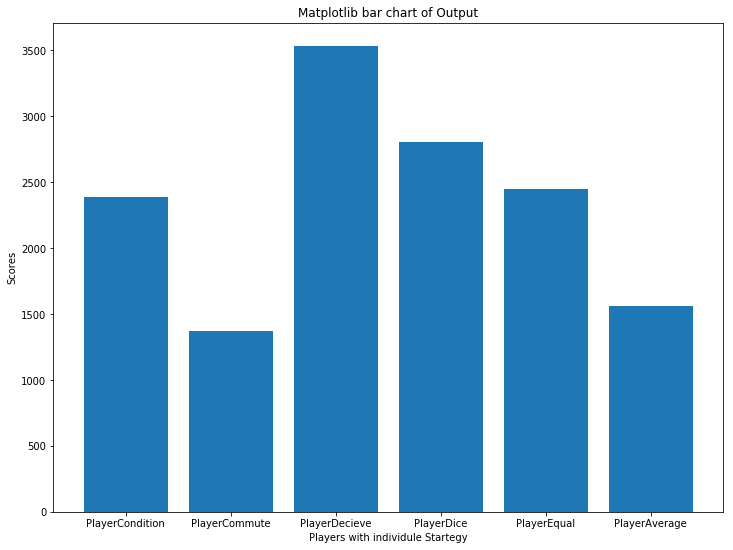

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt


data = s
names = list(data.keys())
values = list(data.values())

#tick_label does the some work as plt.xticks()
plt.bar(range(len(data)),values,tick_label=names)
plt.savefig('bar.png')
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
print "Current size:", fig_size
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
#add title, and y , x lables
plt.title('Matplotlib bar chart of Output')
plt.xlabel('Players with individule Startegy')
plt.ylabel('Scores')

plt.show()
plt.figure()

Current size: [12.0, 9.0]


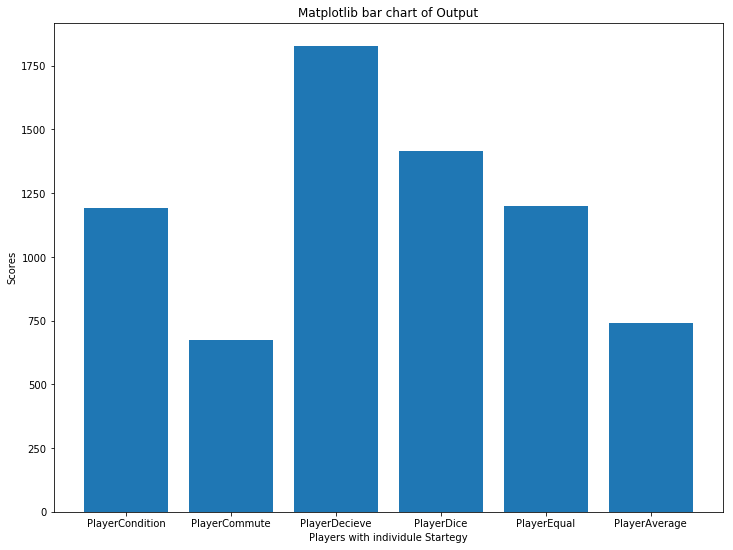

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt


data = s1
names = list(data.keys())
values = list(data.values())

#tick_label does the some work as plt.xticks()
plt.bar(range(len(data)),values,tick_label=names)
plt.savefig('bar.png')
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
print "Current size:", fig_size
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
#add title, and y , x lables
plt.title('Matplotlib bar chart of Output')
plt.xlabel('Players with individule Startegy')
plt.ylabel('Scores')

plt.show()
plt.figure()

Current size: [12.0, 9.0]


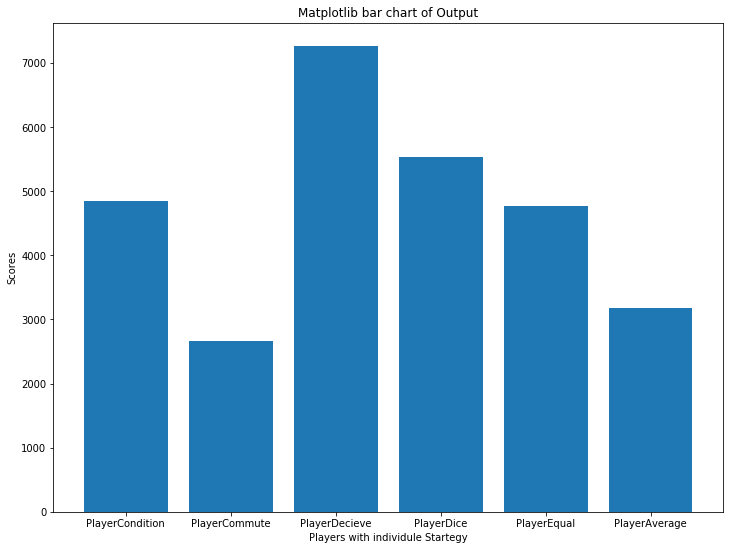

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt


data = s2
names = list(data.keys())
values = list(data.values())

#tick_label does the some work as plt.xticks()
plt.bar(range(len(data)),values,tick_label=names)
plt.savefig('bar.png')
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
print "Current size:", fig_size
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
#add title, and y , x lables
plt.title('Matplotlib bar chart of Output')
plt.xlabel('Players with individule Startegy')
plt.ylabel('Scores')

plt.show()
plt.figure()

<font color="red"><b>Q-3:</b></font><font color="purple">Comment on the the most successful strategy found. Include a brief explanation of why this strategy has been successful and the number of rounds to achieve this performance.</font>  <b> (6 marks)</b>

<font color="red"><b>Q-4:</b></font><font color="purple">Including a brief explanation, give the asymptotic (big-O) times for the run_tournament (a) and run_head_to_head methods (b) in the Referee class?</font>  <b> (2 marks each)</b>

In [19]:
    asymptotic time
a)
b)

SyntaxError: invalid syntax (<ipython-input-19-5ef8cc5af538>, line 1)

Note: This is an <b>individual assignment</b>; sharing your work with colleagues or passing off the work of others as your own is plagiarism and will harm your chance to successfully complete this module. 